In [103]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import math
import operator
import random
from numpy.random import randint





## Definir o grafo

In [46]:
data = pd.read_csv('miseraveis.csv')

In [47]:
maxi = max(data['from'].max(),data['to'].max())
n = maxi + 1
vertices = list(range(n))

In [48]:
graph = nx.DiGraph()
graph.add_nodes_from(vertices)

In [49]:
for index, row in data.iterrows():
    graph.add_edge(row['from'], row['to'])

## Algoritmo

Criar a matriz de adjacências

In [50]:
A = nx.to_numpy_matrix(graph)


In [57]:
P = np.zeros((n,n))

for i in range(n):
    for j in range(n):
        
        # se a soma da linha for >0
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
            
        # se a soma da linha for  = 0 , todos os valores recebem 1/n
        else:
            P[i,j] = 1/n
print(P)

[[0.         0.1        0.1        ... 0.         0.         0.        ]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


In [71]:
def check_sum_lines(n, P):
        
    for i in range(n):
        for j in range(n):

            if(not math.isclose(np.sum(P[i,:]),1)):
                print('A matriz não é estocástica')
                return False
    print('A matriz é estocástica')
    return True
    

In [72]:
check_sum_lines(n, P)

A matriz é estocástica


True

Ajuste ergódico e criação da matriz google

In [74]:
G = np.zeros((n,n))
# número utilizado pelo google para fazer o page rank
alpha = 0.85

for i in range(n):
    for j in range(n):
        G[i,j] = alpha*P[i,j] + (1-alpha)/n
print(G)

[[0.00194805 0.08694805 0.08694805 ... 0.00194805 0.00194805 0.00194805]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.00194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


Agora que temos uma matriz aperíodica e irredutível, podemos calcular a distribuiçao estacionária que será nosso page rank

In [150]:
# Cálculo dos autovetores e autovalores
eigvals, eigvecs = np.linalg.eig(G.T)
# Encontrar o autovetor cujo autovalor é próximo de 1
pi = eigvecs[:,np.isclose(eigvals, 1)]

stationary_dist = (pi / pi.sum()).real

stationary_dict = {}
for i in range(n):
    
    stationary_dict[i] = stationary_dist[i][0]
    
    

In [92]:
print(f'O vértice mais importante é o {stationary_dist.argmax()} com valor {stationary_dist.max()}')
print(f'O vértice menos importante é o {stationary_dist.argmin()} com valor {stationary_dist.min()}')


O vértice mais importante é o 76 com valor 0.06610303793076111
O vértice menos importante é o 0 com valor 0.0057963843538979066


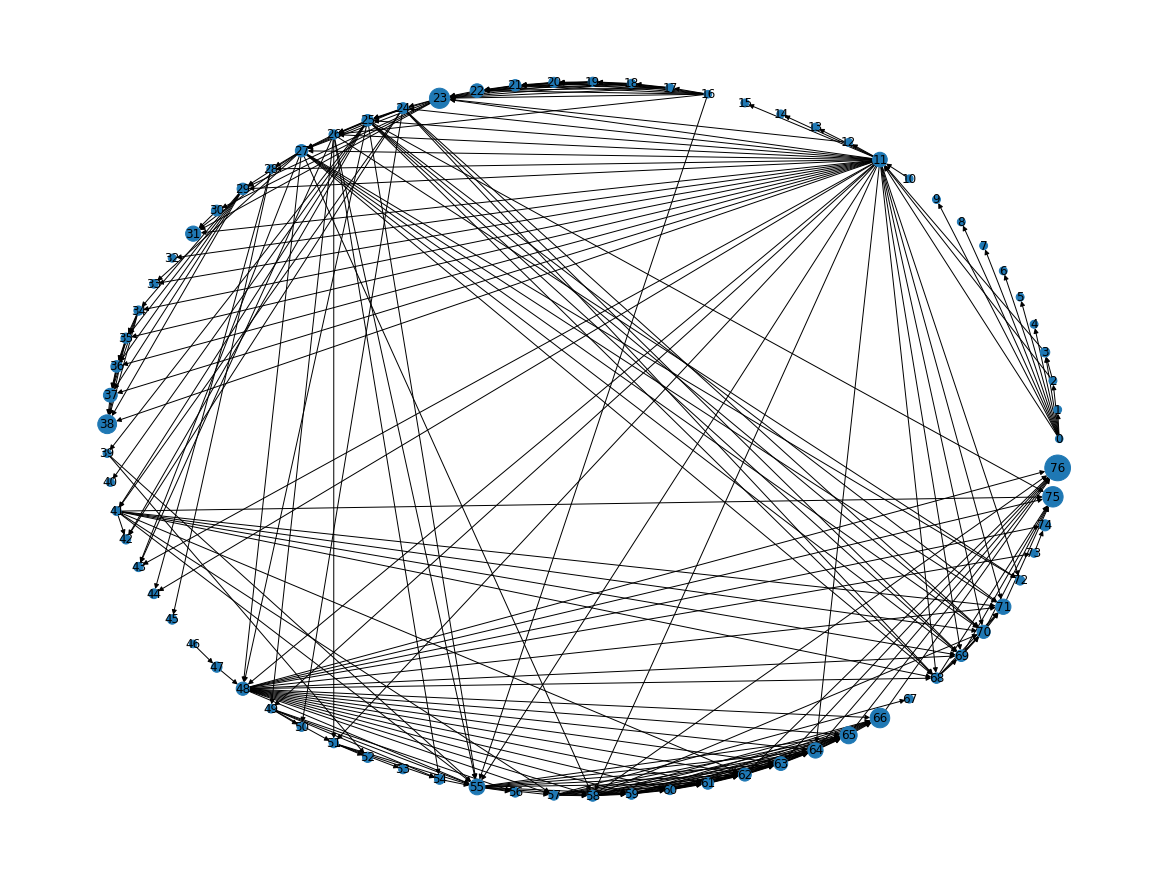

In [95]:
plt.figure(figsize=(16,12))
npos = nx.circular_layout(graph,scale=1)

s = stationary_dist*10000
nx.draw(graph,pos = npos, with_labels=True, node_size = s, arrows=True)
plt.draw()
plt.show()

Executando um random walk


In [229]:


# random_node is the start node selected randomly
random_node = randint(0, n)

visit = {} #initialise the value for all nodes as 0
for i in range(n):
    visit[i] = 0
    
# inicializa o primeiro elemento que será visitado
visit[random_node] = visit[random_node]+1

steps = 10000
   
for i in range(steps):
    
    # encontra todas os possíveis vizinhos do vertice
    list_for_nodes = list(graph.neighbors(random_node))
    
    # caso nao tenha nenhum vizinho, pula para um próximo nó aleatório
    if len(list_for_nodes)==0:
    
        random_node = randint(0, n)
        visit[random_node] = visit[random_node]+1
        
    else:
        # escolhe o próximo passo randomicamente dentre os possiveis vizinhos
        random_node = random.choice(list_for_nodes)
        visit[random_node] = visit[random_node] + 1
        


In [230]:

print(sorted(visit.items(), key=operator.itemgetter(1),reverse=True))
print(sorted(stationary_dict.items(), key=operator.itemgetter(1),reverse=True))


[(76, 893), (75, 471), (66, 470), (23, 434), (38, 389), (65, 354), (64, 280), (55, 254), (31, 241), (71, 241), (63, 224), (11, 191), (22, 190), (37, 185), (62, 165), (27, 164), (48, 161), (70, 155), (36, 141), (69, 139), (25, 138), (29, 136), (58, 126), (61, 126), (21, 120), (30, 120), (24, 112), (59, 112), (74, 104), (57, 103), (35, 101), (68, 101), (54, 99), (20, 98), (47, 94), (44, 90), (42, 89), (34, 84), (26, 82), (72, 82), (60, 81), (52, 80), (43, 79), (56, 78), (3, 77), (33, 76), (19, 75), (28, 72), (51, 71), (45, 70), (18, 66), (53, 65), (17, 63), (50, 61), (14, 60), (2, 59), (16, 59), (40, 59), (6, 57), (41, 56), (8, 54), (39, 54), (12, 51), (49, 51), (0, 48), (32, 48), (73, 48), (4, 47), (46, 47), (15, 46), (67, 45), (1, 44), (5, 41), (7, 39), (10, 39), (13, 39), (9, 37)]
[(76, 0.06610303793076111), (75, 0.04157827826291088), (23, 0.04074410012066746), (66, 0.03838682977602117), (38, 0.03533936174557281), (65, 0.029310988208034523), (55, 0.024881699430491004), (71, 0.02336702

Comparando nossos cálculos com a funçao já existente na biblioteca networkx

In [231]:
rank_node = nx.pagerank(graph)

closeness = []

for i in range(n):
    
   closeness.append(math.isclose(stationary_dict[i],rank_node[i],rel_tol = 0.0001))

if(all(closeness)):
    print('Sao similares')
else:
    print('Nao sao tao similares')

    

Sao similares


In [232]:
sorted_stationary = sorted(stationary_dict.items(), key=operator.itemgetter(1),reverse=True)
sorted_stationary = [x[0] for x in sorted_stationary]

sorted_visit = sorted(visit.items(), key=operator.itemgetter(1),reverse=True)
sorted_visit = [x[0] for x in sorted_visit]


In [234]:
print(sorted_stationary[:10])
print(sorted_visit[:10])



[76, 75, 23, 66, 38, 65, 55, 71, 64, 31]
[76, 75, 66, 23, 38, 65, 64, 55, 31, 71]
